In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, validation_curve, \
                                    GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

In [99]:
#@title 
df = pd.read_csv('drive/MyDrive/Colab Datasets/train.csv')
df = df.rename(columns={'state':'estado', 'account_length':'num_meses_prov_atual', 'area_code':'cod_area', \
                              'international_plan':'plano_internacional', 'voice_mail_plan':'plano_correio_de_voz', \
                              'number_vmail_messages':'num_msgs_correio_de_voz', 'total_day_minutes':'total_min_chams_dia', \
                              'total_day_calls':'total_chams_dia', 'total_day_charge':'cobr_total_chams_dia', \
                              'total_eve_minutes':'total_mins_chams_noturnas', 'total_eve_calls':'total_chams_noturnas', \
                              'total_eve_charge':'cobr_total_chams_noturnas', 'total_night_minutes':'total_mins_noite', \
                              'total_night_calls':'total_chams_noite', 'total_night_charge':'cobr_total_noite', \
                              'total_intl_minutes':'total_mins_chams_inter', \
                              'total_intl_calls':'total_chams_inter', 'total_intl_charge':'cobr_total_chams_inter', \
                              'number_customer_service_calls':'num_chams_atend_clien'})

In [100]:
df.head()

,estado,num_meses_prov_atual,cod_area,plano_internacional,plano_correio_de_voz,num_msgs_correio_de_voz,total_min_chams_dia,total_chams_dia,cobr_total_chams_dia,total_mins_chams_noturnas,total_chams_noturnas,cobr_total_chams_noturnas,total_mins_noite,total_chams_noite,cobr_total_noite,total_mins_chams_inter,total_chams_inter,cobr_total_chams_inter,num_chams_atend_clien,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [101]:
df.columns

Index(['estado', 'num_meses_prov_atual', 'cod_area', 'plano_internacional',
       'plano_correio_de_voz', 'num_msgs_correio_de_voz',
       'total_min_chams_dia', 'total_chams_dia', 'cobr_total_chams_dia',
       'total_mins_chams_noturnas', 'total_chams_noturnas',
       'cobr_total_chams_noturnas', 'total_mins_noite', 'total_chams_noite',
       'cobr_total_noite', 'total_mins_chams_inter', 'total_chams_inter',
       'cobr_total_chams_inter', 'num_chams_atend_clien', 'churn'],
      dtype='object')

# 1. Análise exploratória dos dados

In [49]:
df.shape

(4250, 20)

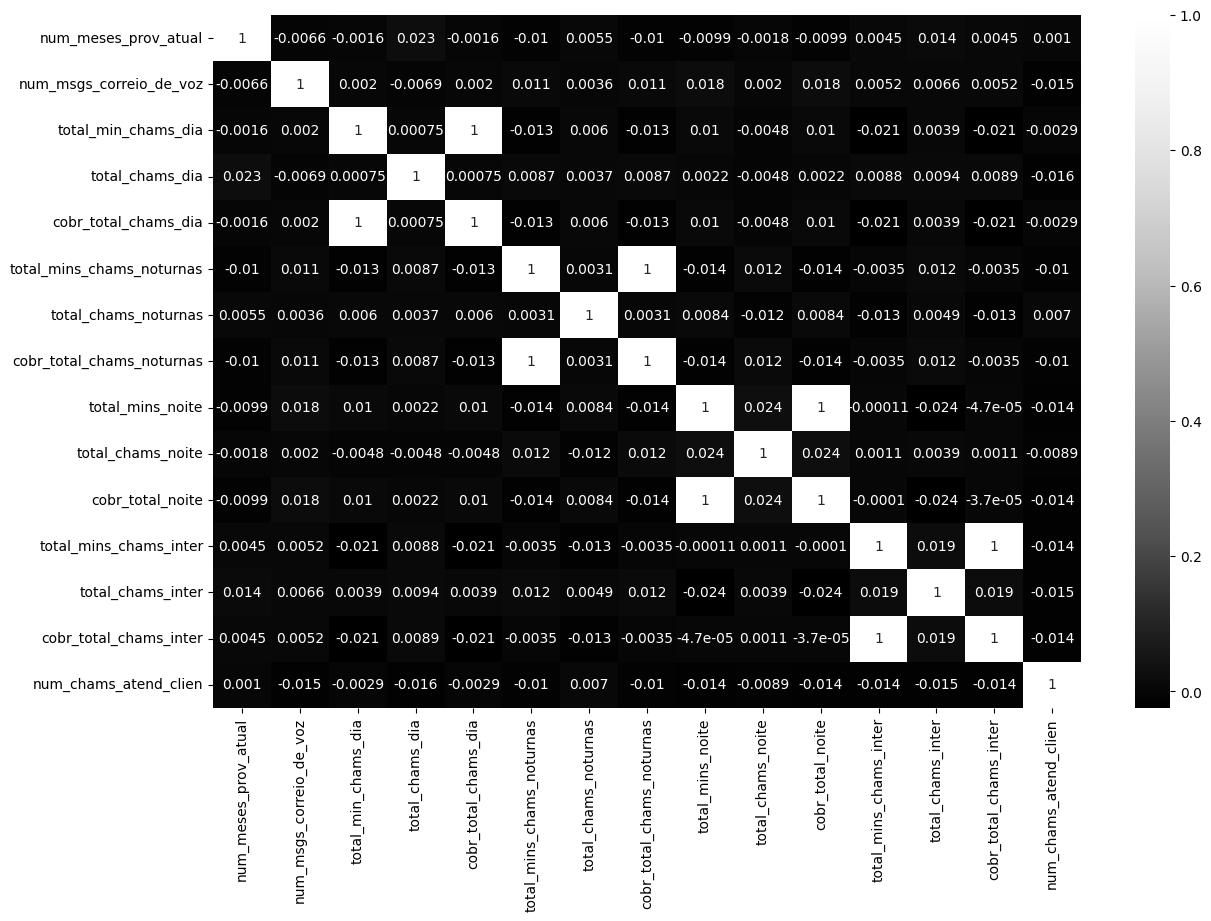

In [50]:
#@title 
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(14,9))
sns.heatmap(corr_matrix, annot=True, cmap="Greys_r")
plt.show()

In [51]:
df.describe()

,num_meses_prov_atual,num_msgs_correio_de_voz,total_min_chams_dia,total_chams_dia,cobr_total_chams_dia,total_mins_chams_noturnas,total_chams_noturnas,cobr_total_chams_noturnas,total_mins_noite,total_chams_noite,cobr_total_noite,total_mins_chams_inter,total_chams_inter,cobr_total_chams_inter,num_chams_atend_clien
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [52]:
#@title 
# porcentagem de clientes churn e not churn
df['churn'].value_counts()/len(df)*100

no     85.929412
yes    14.070588
Name: churn, dtype: float64

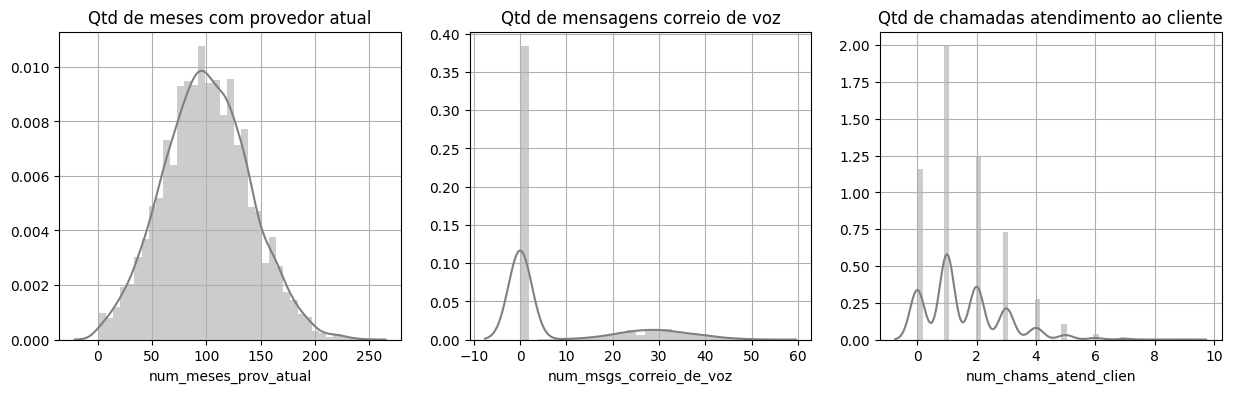

In [53]:
#@title
f, axes = plt.subplots(ncols=3, figsize=(15, 4))

# sns.displot: distribuição de dados univariados
sns.distplot(df.num_meses_prov_atual, kde=True, color="gray", ax=axes[0]).set_title('Qtd de meses com provedor atual')
axes[0].set_ylabel('')
axes[0].grid()

sns.distplot(df.num_msgs_correio_de_voz, kde=True, color="gray", ax=axes[1]).set_title('Qtd de mensagens correio de voz')
axes[1].set_ylabel('')
axes[1].grid()

sns.distplot(df.num_chams_atend_clien, kde=True, color="gray", ax=axes[2]).set_title('Qtd de chamadas atendimento ao cliente')
axes[2].set_ylabel('')
axes[2].grid()

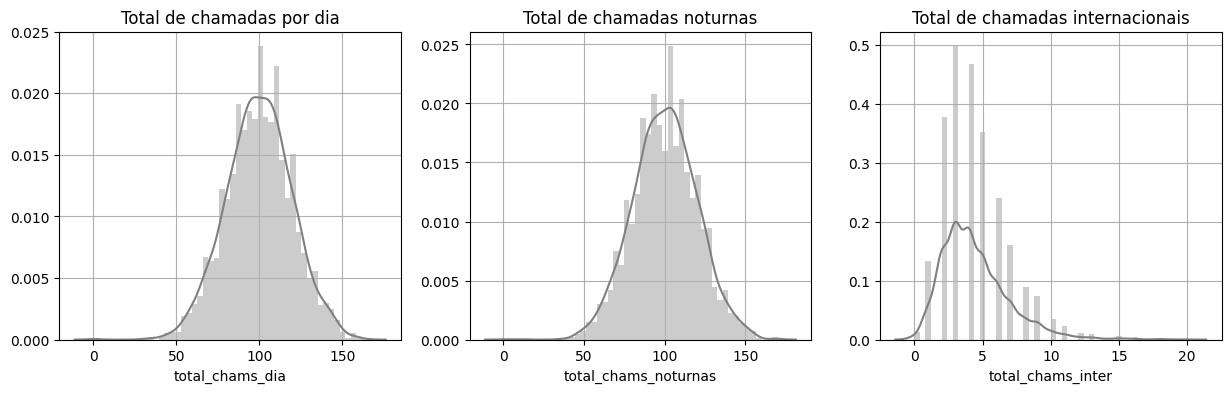

In [54]:
#@title
f, axes = plt.subplots(ncols=3, figsize=(15, 4))

sns.distplot(df.total_chams_dia, kde=True, color="gray", ax=axes[0]).set_title('Total de chamadas por dia')
axes[0].set_ylabel('')
axes[0].grid()

sns.distplot(df.total_chams_noturnas, kde=True, color="gray", ax=axes[1]).set_title('Total de chamadas noturnas')
axes[1].set_ylabel('')
axes[1].grid()

sns.distplot(df.total_chams_inter, kde=True, color="gray", ax=axes[2]).set_title('Total de chamadas internacionais')
axes[2].set_ylabel('')
axes[2].grid()

Text(0, 0.5, '')

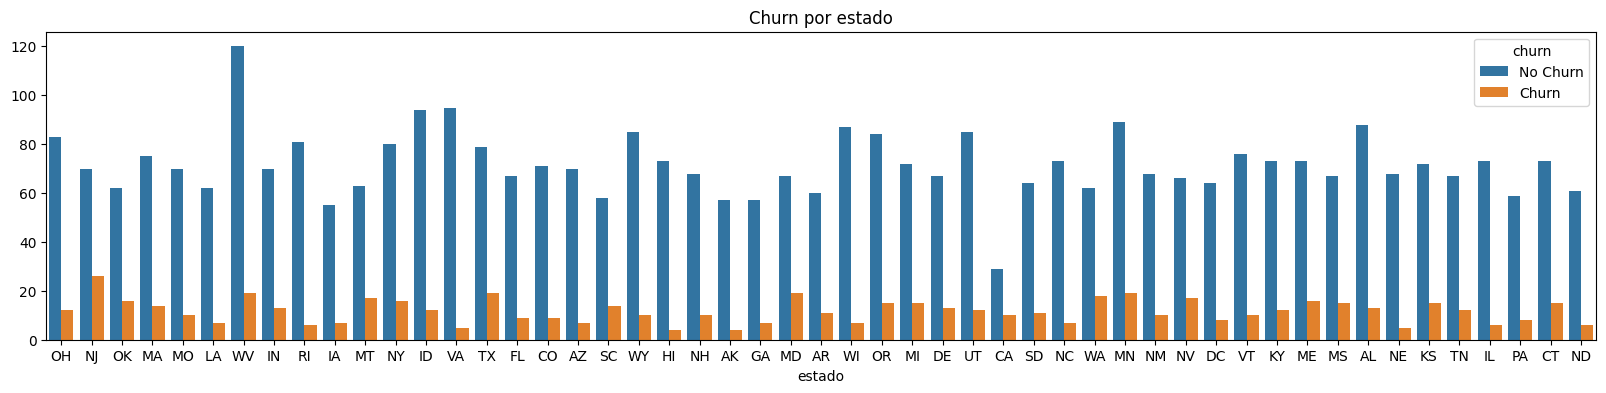

In [55]:
#@title
plt.figure(figsize=(20,4))
p = sns.countplot(x='estado', hue='churn', data = df)
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Churn por estado')
p.set_ylabel('')

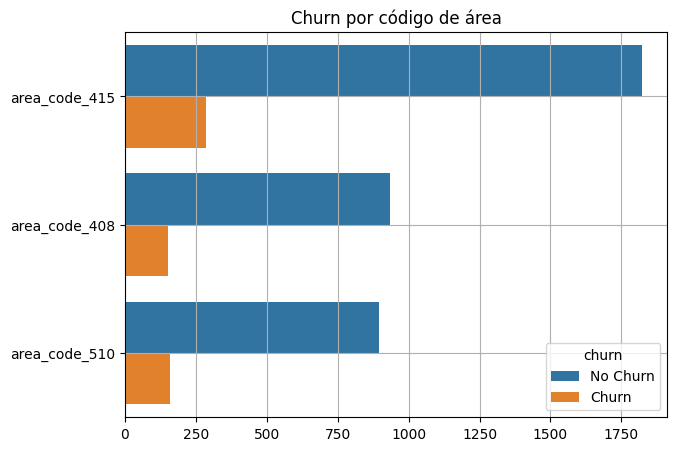

In [56]:
#@title 
plt.figure(figsize=(7,5))
p = sns.countplot(y="cod_area", hue='churn', data=df)
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Churn por código de área')
p.set_xlabel('')
p.set_ylabel('')
p.grid()

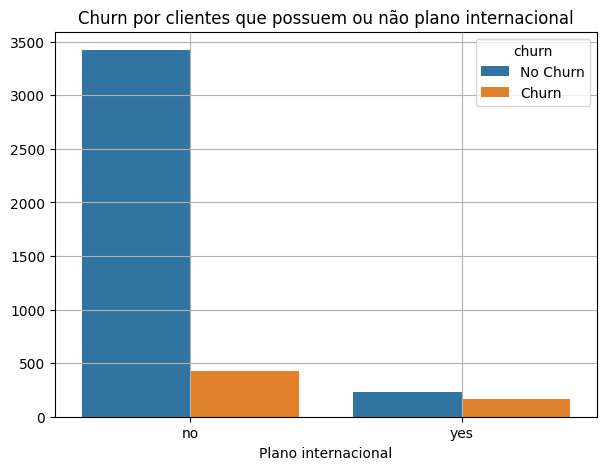

In [57]:
#@title
plt.figure(figsize=(7,5))
p = sns.countplot(x="plano_internacional", hue='churn', data=df)
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Churn por clientes que possuem ou não plano internacional')
p.set_xlabel('Plano internacional')
p.set_ylabel('')
p.grid()

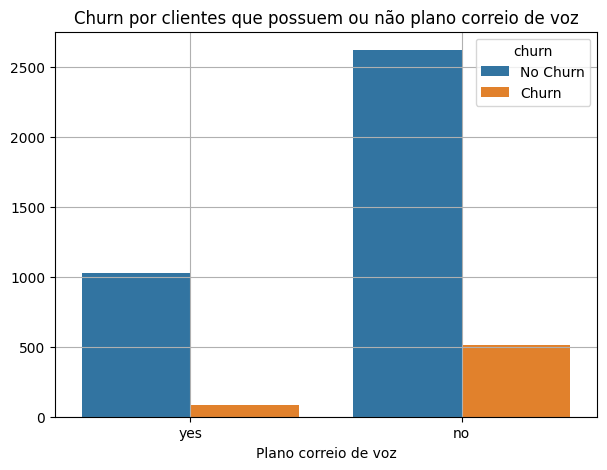

In [58]:
#@title 
plt.figure(figsize=(7,5))
p = sns.countplot(x="plano_correio_de_voz", hue='churn', data=df)
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Churn por clientes que possuem ou não plano correio de voz')
p.set_xlabel('Plano correio de voz')
p.set_ylabel('')
p.grid()

In [59]:
#@title 
summary_churn = df.groupby('churn')
summary_churn.mean()

,num_meses_prov_atual,num_msgs_correio_de_voz,total_min_chams_dia,total_chams_dia,cobr_total_chams_dia,total_mins_chams_noturnas,total_chams_noturnas,cobr_total_chams_noturnas,total_mins_noite,total_chams_noite,cobr_total_noite,total_mins_chams_inter,total_chams_inter,cobr_total_chams_inter,num_chams_atend_clien
churn,,,,,,,,,,,,,,,
no,99.924973,8.177437,175.555093,99.813801,29.844948,198.570674,100.231380,16.878743,199.577519,99.942771,8.981131,10.194441,4.460570,2.753018,1.441676
yes,102.137124,4.299331,208.990134,100.478261,35.528679,209.964883,99.841137,17.847207,206.331773,99.209030,9.285033,10.632441,4.217391,2.871254,2.275920


In [60]:
#@title
summary_churn.median()

,num_meses_prov_atual,num_msgs_correio_de_voz,total_min_chams_dia,total_chams_dia,cobr_total_chams_dia,total_mins_chams_noturnas,total_chams_noturnas,cobr_total_chams_noturnas,total_mins_noite,total_chams_noite,cobr_total_noite,total_mins_chams_inter,total_chams_inter,cobr_total_chams_inter,num_chams_atend_clien
churn,,,,,,,,,,,,,,,
no,99.0,0.0,178.25,100.0,30.300,199.2,100.0,16.93,199.3,100.0,8.970,10.3,4.0,2.78,1.0
yes,101.0,0.0,220.55,101.0,37.495,210.2,99.5,17.87,206.1,99.0,9.275,10.6,4.0,2.86,2.0


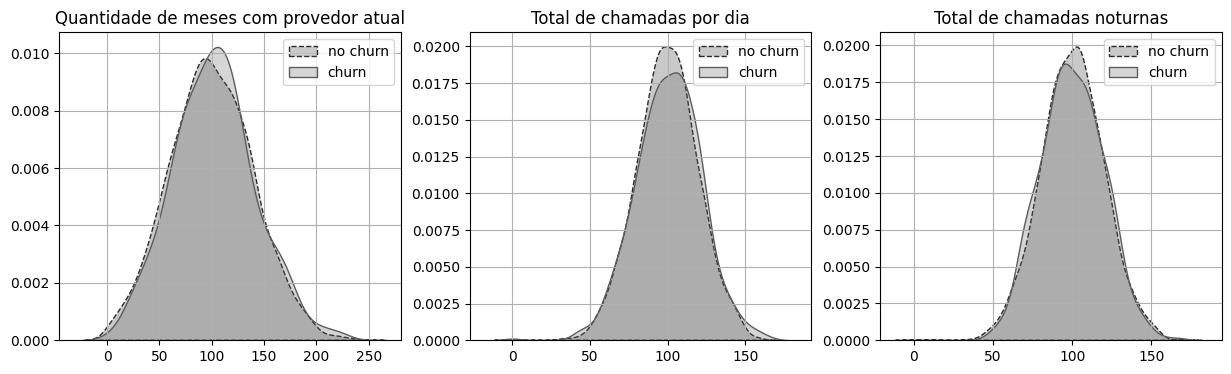

In [61]:
#@title
f, axes = plt.subplots(ncols=3, figsize=(15, 4))

axes[0]=sns.kdeplot(df.loc[(df['churn'] == 'no'), 'num_meses_prov_atual'] , ax=axes[0], color=sns.color_palette("Greys_r")[0], shade=True, label='no churn', linestyle='--')
axes[0]=sns.kdeplot(df.loc[(df['churn'] == 'yes'), 'num_meses_prov_atual'] , ax=axes[0], color=sns.color_palette("Greys_r")[1], shade=True, label='churn')
axes[0].set(xlabel='', ylabel='', title='Quantidade de meses com provedor atual')
axes[0].legend()
axes[0].grid()

axes[1]=sns.kdeplot(df.loc[(df['churn'] == 'no'), 'total_chams_dia'] , ax=axes[1], color=sns.color_palette("Greys_r")[0], shade=True, label='no churn', linestyle='--')
axes[1]=sns.kdeplot(df.loc[(df['churn'] == 'yes'), 'total_chams_dia'] , ax=axes[1], color=sns.color_palette("Greys_r")[1], shade=True, label='churn')
axes[1].set(xlabel='', ylabel='', title='Total de chamadas por dia')
axes[1].legend()
axes[1].grid()

axes[2]=sns.kdeplot(df.loc[(df['churn'] == 'no'), 'total_chams_noturnas'] , ax=axes[2], color=sns.color_palette("Greys_r")[0], shade=True, label='no churn', linestyle='--')
axes[2]=sns.kdeplot(df.loc[(df['churn'] == 'yes'), 'total_chams_noturnas'] , ax=axes[2], color=sns.color_palette("Greys_r")[1], shade=True, label='churn')
axes[2].set(xlabel='', ylabel='', title='Total de chamadas noturnas')
axes[2].legend()
axes[2].grid()

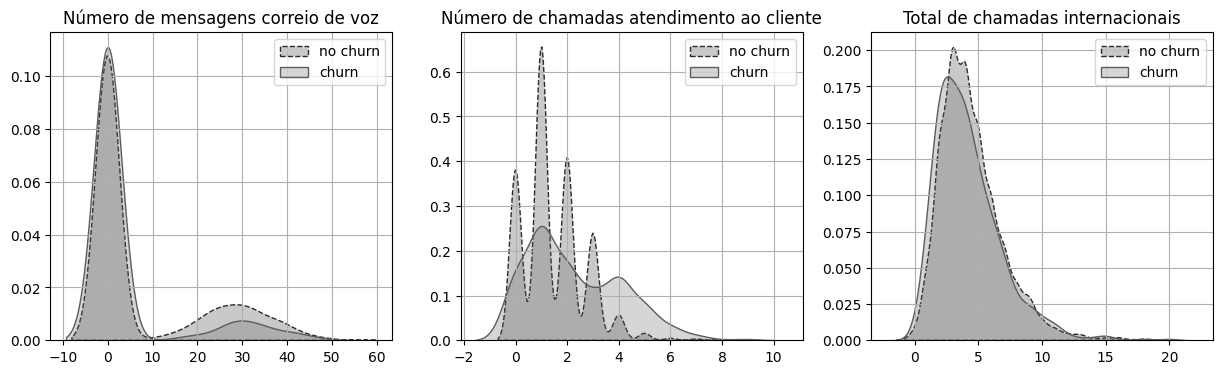

In [62]:
#@title 
f, axes = plt.subplots(ncols=3, figsize=(15, 4))

axes[0]=sns.kdeplot(df.loc[(df['churn'] == 'no'), 'num_msgs_correio_de_voz'] , ax=axes[0], color=sns.color_palette("Greys_r")[0], shade=True, label='no churn', linestyle='--')
axes[0]=sns.kdeplot(df.loc[(df['churn'] == 'yes'), 'num_msgs_correio_de_voz'] , ax=axes[0], color=sns.color_palette("Greys_r")[1], shade=True, label='churn')
axes[0].set(xlabel='', ylabel='', title='Número de mensagens correio de voz')
axes[0].legend()
axes[0].grid()

axes[1]=sns.kdeplot(df.loc[(df['churn'] == 'no'), 'num_chams_atend_clien'] , ax=axes[1], color=sns.color_palette("Greys_r")[0], shade=True, label='no churn', linestyle='--')
axes[1]=sns.kdeplot(df.loc[(df['churn'] == 'yes'), 'num_chams_atend_clien'] , ax=axes[1], color=sns.color_palette("Greys_r")[1], shade=True, label='churn')
axes[1].set(xlabel='', ylabel='', title='Número de chamadas atendimento ao cliente')
axes[1].legend()
axes[1].grid()

axes[2]=sns.kdeplot(df.loc[(df['churn'] == 'no'), 'total_chams_inter'] , ax=axes[2], color=sns.color_palette("Greys_r")[0], shade=True, label='no churn', linestyle='--')
axes[2]=sns.kdeplot(df.loc[(df['churn'] == 'yes'), 'total_chams_inter'] , ax=axes[2], color=sns.color_palette("Greys_r")[1], shade=True, label='churn')
axes[2].set(xlabel='', ylabel='', title='Total de chamadas internacionais')
axes[2].legend()
axes[2].grid()

# 2. Aplicando diferentes modelos de classificação 

In [63]:
# codificando variáveis categóricas
df['churn'] = df['churn'].replace({'yes': 1, 'no': 0})

lb = LabelBinarizer()
df['plano_internacional'] = lb.fit_transform(df['plano_internacional'])
df['plano_correio_de_voz'] = lb.fit_transform(df['plano_correio_de_voz'])

dummy_area_codes = pd.get_dummies(df['cod_area'], prefix='cod_area')
dummy_states = pd.get_dummies(df['estado'], prefix='estado')
df = pd.concat([df, dummy_area_codes, dummy_states], axis=1)
df.drop(['estado', 'cod_area'], axis=1, inplace=True)

In [64]:
# divisão em treino e teste
X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## **2.1 Logistic Regression**



In [65]:
pipe = Pipeline(steps = [('standardscaler', StandardScaler()),
                         ('classifier', LogisticRegression(random_state=42))])

pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('classifier', LogisticRegression(random_state=42))])

In [66]:
scores = cross_validate(pipe, X_train, y_train, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=5)

print("Logistic Regression\n")
print("Cross validation\n")
print('Acurácia média:', scores['test_accuracy'].mean())
print('Precisão média:', scores['test_precision'].mean())
print('Recall médio:', scores['test_recall'].mean())
print('f1 médio:', scores['test_f1'].mean())
print('AUC-ROC médio:', scores['test_roc_auc'].mean())

y_pred = pipe.predict(X_test)

print('\n')
print("Score com os dados de teste")
print('\n')

print('Matriz de Confusão\n\n', confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))
print('auc-roc: ', roc_auc_score(y_test, y_pred))

Logistic Regression

Cross validation

Acurácia média: 0.8691176470588236
Precisão média: 0.5778203082272849
Recall médio: 0.26978070175438595
f1 médio: 0.36650054346236355
AUC-ROC médio: 0.8209948248849204


Score com os dados de teste


Matriz de Confusão

 [[692  38]
 [ 92  28]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       730
           1       0.42      0.23      0.30       120

    accuracy                           0.85       850
   macro avg       0.65      0.59      0.61       850
weighted avg       0.82      0.85      0.83       850

auc-roc:  0.5906392694063927


### Ajustando os hiperparâmetros do modelo 

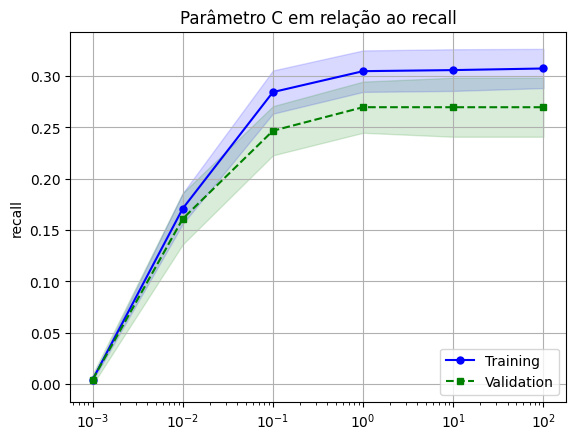

In [67]:
#@title 
C_range = [0.001, 0.01, 0.1, 1, 10, 100]

train_scores, test_scores = validation_curve(pipe, X_train, y_train, param_name='classifier__C', param_range=C_range, 
                                             scoring='recall', cv=5)

# Calcula as médias e desvios padrão das métricas para cada valor de C nos dados de treino e teste
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plota as curvas de validação cruzada para cada métrica
plt.plot(C_range, train_mean, color='blue', marker='o', markersize=5, label='Training')
plt.fill_between(C_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(C_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation')
plt.fill_between(C_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.title('Parâmetro C em relação ao recall')
plt.legend(loc='lower right')
plt.ylabel('recall')
plt.show()

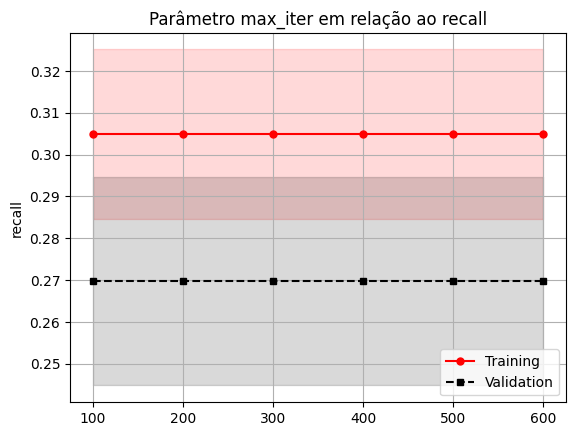

In [68]:
#@title
M_range = [100, 200, 300, 400, 500, 600]
train_scores, test_scores = validation_curve(pipe, X_train, y_train, param_name='classifier__max_iter', param_range=M_range, 
                                             scoring='recall', cv=5)

# Calcula as médias e desvios padrão das métricas para cada valor de max_iter nos dados de treino e teste
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plota as curvas de validação cruzada para cada métrica
plt.plot(M_range, train_mean, color='red', marker='o', markersize=5, label='Training')
plt.fill_between(M_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='red')
plt.plot(M_range, test_mean, color='black', linestyle='--', marker='s', markersize=5, label='Validation')
plt.fill_between(M_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='black')
plt.grid()
plt.title('Parâmetro max_iter em relação ao recall')
plt.legend(loc='lower right')
plt.ylabel('recall')
plt.show()

In [69]:
# redefinindo o pipe com o hiperparâmetro 'class_weight' a fim de dar mais peso à classe menos frequente
pipe = Pipeline(steps = [('standardscaler', StandardScaler()),
                         ('classifier', LogisticRegression(random_state=42, class_weight='balanced'))])

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {'classifier__penalty': ['l1', 'l2'],
              'classifier__C': [0.001, 0.01, 0.1],
              'classifier__solver': ['newton-cg', 'liblinear', 'saga'],
              'classifier__max_iter': [100, 1000, 10000]}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

grid_search = GridSearchCV(estimator=pipe,
                           param_grid=param_grid,
                           scoring=scoring,
                           cv=stratified_kfold,
                           refit='recall', # métrica utilizada para selecionar o melhor modelo
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.001, 0.01, 0.1],
                         'classifier__max_iter': [100, 1000, 10000],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['newton-cg', 'liblinear',
                                                'saga']},
             refit='recall',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [70]:
#@title 
results = grid_search.cv_results_
mean_accuracy = results['mean_test_accuracy']
mean_precision = results['mean_test_precision']
mean_recall = results['mean_test_recall']
mean_f1 = results['mean_test_f1']
mean_roc_auc = results['mean_test_roc_auc']

mean_accuracy = mean_accuracy[np.logical_not(np.isnan(mean_accuracy))]
mean_precision = mean_precision[np.logical_not(np.isnan(mean_precision))]
mean_recall = mean_recall[np.logical_not(np.isnan(mean_recall))]
mean_f1 = mean_f1[np.logical_not(np.isnan(mean_f1))]
mean_roc_auc = mean_roc_auc[np.logical_not(np.isnan(mean_roc_auc))]

print('Logistic Regression + GridSearchCV\n')
print("Cross validation\n")
print('Acurácia média:', mean_accuracy.mean())
print('Precisão média:', mean_precision.mean())
print('Recall médio:', mean_recall.mean())
print('F1 médio:', mean_f1.mean())
print('AUC-ROC médio:', mean_roc_auc.mean())
print("\n")

# imprime os melhores valores e melhores parâmetros para cada métrica
for metric in scoring:
    best_index = results[f"rank_test_{metric}"].argmin()
    best_params = results['params'][best_index]
    best_score = results[f"mean_test_{metric}"][best_index]
    print(f"Melhores parâmetros para {metric}: {best_params}")
    print(f"Melhor score para {metric}: {best_score}")
    print("\n")

Logistic Regression + GridSearchCV

Cross validation

Acurácia média: 0.7831764705882355
Precisão média: 0.3087462572686945
Recall médio: 0.6574152046783625
F1 médio: 0.419274575670569
AUC-ROC médio: 0.7865207368773668


Melhores parâmetros para accuracy: {'classifier__C': 0.001, 'classifier__max_iter': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Melhor score para accuracy: 0.8594117647058823


Melhores parâmetros para precision: {'classifier__C': 0.1, 'classifier__max_iter': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Melhor score para precision: 0.37282864288933615


Melhores parâmetros para recall: {'classifier__C': 0.001, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Melhor score para recall: 0.8305263157894736


Melhores parâmetros para f1: {'classifier__C': 0.1, 'classifier__max_iter': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Melhor score para f1: 0.500476950150551



In [71]:
#@title 
print("Score com os dados de teste\n")
y_pred = grid_search.predict(X_test)
print('Matriz de Confusão\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('auc-roc: ', roc_auc_score(y_test, y_pred))

Score com os dados de teste

Matriz de Confusão
 [[474 256]
 [ 21  99]]
              precision    recall  f1-score   support

           0       0.96      0.65      0.77       730
           1       0.28      0.82      0.42       120

    accuracy                           0.67       850
   macro avg       0.62      0.74      0.60       850
weighted avg       0.86      0.67      0.72       850

auc-roc:  0.7371575342465754


### Aplicando SMOTE

In [72]:
pipe = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                            ['standardscaler', StandardScaler()],
                            ['classifier', LogisticRegression(random_state=42)]])

pipe.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('standardscaler', StandardScaler()),
                ['classifier', LogisticRegression(random_state=42)]])

In [73]:
#@title 
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {'classifier__penalty': ['l1', 'l2'],
              'classifier__C': [0.001, 0.01, 0.1],
              'classifier__solver': ['newton-cg', 'liblinear', 'saga'],
              'classifier__max_iter': [100, 1000, 10000]}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

grid_search = GridSearchCV(estimator=pipe,
                           param_grid=param_grid,
                           scoring=scoring,
                           cv=stratified_kfold,
                           refit='recall', # métrica utilizada para selecionar o melhor modelo
                           n_jobs=-1)

grid_search.fit(X_train, y_train)


results = grid_search.cv_results_
mean_accuracy = results['mean_test_accuracy']
mean_precision = results['mean_test_precision']
mean_recall = results['mean_test_recall']
mean_f1 = results['mean_test_f1']
mean_roc_auc = results['mean_test_roc_auc']

mean_accuracy = mean_accuracy[np.logical_not(np.isnan(mean_accuracy))]
mean_precision = mean_precision[np.logical_not(np.isnan(mean_precision))]
mean_recall = mean_recall[np.logical_not(np.isnan(mean_recall))]
mean_f1 = mean_f1[np.logical_not(np.isnan(mean_f1))]
mean_roc_auc = mean_roc_auc[np.logical_not(np.isnan(mean_roc_auc))]

print('Logistic Regression + GridSearchCV + SMOTE\n')
print('Acurácia média:', mean_accuracy.mean())
print('Precisão média:', mean_precision.mean())
print('Recall médio:', mean_recall.mean())
print('F1 médio:', mean_f1.mean())
print('AUC-ROC médio:', mean_roc_auc.mean())
print("\n")

# imprime os melhores valores e melhores parâmetros para cada métrica
for metric in scoring:
    best_index = results[f"rank_test_{metric}"].argmin()
    best_params = results['params'][best_index]
    best_score = results[f"mean_test_{metric}"][best_index]
    print(f"Melhores parâmetros para {metric}: {best_params}")
    print(f"Melhor score para {metric}: {best_score}")
    print("\n")


Logistic Regression + GridSearchCV + SMOTE

Acurácia média: 0.8281372549019607
Precisão média: 0.4957620473578502
Recall médio: 0.3258114035087719
F1 médio: 0.353956982620809
AUC-ROC médio: 0.769471158151154


Melhores parâmetros para accuracy: {'classifier__C': 0.01, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}
Melhor score para accuracy: 0.8741176470588237


Melhores parâmetros para precision: {'classifier__C': 0.01, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}
Melhor score para precision: 0.6183818482780896


Melhores parâmetros para recall: {'classifier__C': 0.001, 'classifier__max_iter': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Melhor score para recall: 0.8


Melhores parâmetros para f1: {'classifier__C': 0.001, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}
Melhor score para f1: 0.458060601517232


Melhores parâmetros

In [74]:
#@title 
y_pred = grid_search.predict(X_test)
print("Score com os dados de teste\n")
print('Matriz de Confusão\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('auc-roc: ', roc_auc_score(y_test, y_pred))

Score com os dados de teste

Matriz de Confusão
 [[  0 730]
 [  0 120]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       730
           1       0.14      1.00      0.25       120

    accuracy                           0.14       850
   macro avg       0.07      0.50      0.12       850
weighted avg       0.02      0.14      0.03       850

auc-roc:  0.5


### Adicionando algumas features

In [75]:
# proporção de chamadas feitas durante o dia em relação ao total de chamadas
total_minutos = df['total_min_chams_dia'] + df['total_mins_chams_noturnas'] + df['total_mins_noite'] + df['total_mins_chams_inter']
df['prop_minutos_dia'] = df['total_min_chams_dia'] / total_minutos

df = df.drop('num_msgs_correio_de_voz', axis=1)

# total de chamadas feitas por cliente
df['total_chams'] = df['total_chams_dia'] + df['total_chams_noturnas'] + df['total_chams_noite'] + df['total_chams_inter']

# total de minutos gastos 
df['total_minutos'] =  df['total_min_chams_dia'] + df['total_mins_chams_noturnas'] + df['total_mins_noite'] + df['total_mins_chams_inter']

# média de minutos por ligação
df['avg_minutes_per_call'] = df['total_minutos'] / df['total_chams'] 

# criando as faixas de valores para a coluna 'num_de_meses_prov_atual'
bins = [0, 25, 50, 75, 100, 200]
categories = ['0-25', '26-50', '51-75', '76-100', '+100']
df['range_num_meses_prov_atual'] = pd.cut(df['num_meses_prov_atual'], bins=bins, labels=categories)

# dropa a coluna antiga e codifica a nova
df.drop('num_meses_prov_atual', axis=1, inplace=True)
df = pd.get_dummies(df, columns=['range_num_meses_prov_atual'], prefix='acct_len')

# médias de cobrança por minuto
df['avg_cobr_dia_por_min'] = df['cobr_total_chams_dia'] / df['total_min_chams_dia']
df['avg_cobr_notu_por_min'] = df['cobr_total_chams_noturnas'] / df['total_mins_chams_noturnas']
df['avg_cobr_noit_por_min'] = df['cobr_total_noite'] / df['total_mins_noite']
df['avg_cobr_inter_por_min'] = df['cobr_total_chams_inter'] / df['total_mins_chams_inter']

In [76]:
print(pd.isna(df).sum())

plano_internacional        0
plano_correio_de_voz       0
total_min_chams_dia        0
total_chams_dia            0
cobr_total_chams_dia       0
                          ..
acct_len_+100              0
avg_cobr_dia_por_min       2
avg_cobr_notu_por_min      1
avg_cobr_noit_por_min      1
avg_cobr_inter_por_min    22
Length: 83, dtype: int64


In [77]:
df['avg_cobr_dia_por_min'].fillna(df['avg_cobr_dia_por_min'].mean(), inplace=True)
df['avg_cobr_notu_por_min'].fillna(df['avg_cobr_notu_por_min'].mean(), inplace=True)
df['avg_cobr_noit_por_min'].fillna(df['avg_cobr_noit_por_min'].mean(), inplace=True)
df['avg_cobr_inter_por_min'].fillna(df['avg_cobr_inter_por_min'].mean(), inplace=True)

In [78]:
#@title 
X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pipe = Pipeline(steps = [('standardscaler', StandardScaler()),
                         ('classifier', LogisticRegression(random_state=42, class_weight='balanced'))])

pipe.fit(X_train, y_train)

scores = cross_validate(pipe, X_train, y_train, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=5)

print('Logistic Regression + adição de features\n')
print('Acurácia média:', scores['test_accuracy'].mean())
print('Precisão média:', scores['test_precision'].mean())
print('Recall médio:', scores['test_recall'].mean())
print('f1 médio:', scores['test_f1'].mean())
print('AUC-ROC médio:', scores['test_roc_auc'].mean())

Logistic Regression + adição de features

Acurácia média: 0.798235294117647
Precisão média: 0.3882081461395369
Recall médio: 0.757280701754386
f1 médio: 0.5132687164808015
AUC-ROC médio: 0.8383548603023188


In [79]:
#@title 
y_pred = pipe.predict(X_test)

print("Score com os dados de teste\n")
print('Matriz de Confusão:\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('auc-roc: ', roc_auc_score(y_test, y_pred))

Score com os dados de teste

Matriz de Confusão:
 [[576 154]
 [ 30  90]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       730
           1       0.37      0.75      0.49       120

    accuracy                           0.78       850
   macro avg       0.66      0.77      0.68       850
weighted avg       0.87      0.78      0.81       850

auc-roc:  0.7695205479452054


## **2.2 Decision Tree**



In [80]:
pipe = Pipeline(steps = [['standardscaler', StandardScaler()],
                         ['classifier', DecisionTreeClassifier(random_state=42)]])

pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ['classifier', DecisionTreeClassifier(random_state=42)]])

In [81]:
#@title 
scores = cross_validate(pipe, X_train, y_train, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=5)

print('Decision Tree\n')
print('Acurácia média:', scores['test_accuracy'].mean())
print('Precisão média:', scores['test_precision'].mean())
print('Recall médio:', scores['test_recall'].mean())
print('f1 médio:', scores['test_f1'].mean())
print('AUC-ROC médio:', scores['test_roc_auc'].mean())

y_pred = pipe.predict(X_test)
print('\nMatriz de Confusão\n\n', confusion_matrix(y_test, y_pred))
print('\n')
print("Score com os dados de teste\n")
print(classification_report(y_test, y_pred))
print('auc-roc: ', roc_auc_score(y_test, y_pred))

Decision Tree

Acurácia média: 0.9214705882352942
Precisão média: 0.7113552694220684
Recall médio: 0.7466666666666667
f1 médio: 0.7274325831900675
AUC-ROC médio: 0.8483488467392577

Matriz de Confusão

 [[698  32]
 [ 34  86]]


Score com os dados de teste

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       730
           1       0.73      0.72      0.72       120

    accuracy                           0.92       850
   macro avg       0.84      0.84      0.84       850
weighted avg       0.92      0.92      0.92       850

auc-roc:  0.8364155251141553


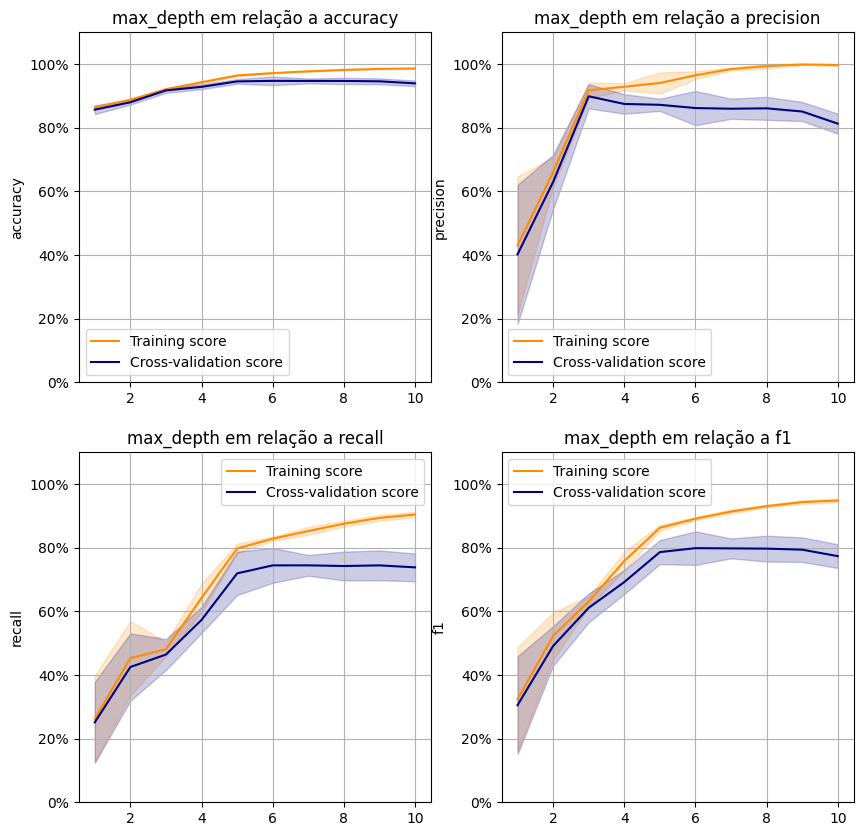

In [82]:
#@title 
param_range = np.arange(1, 11)
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Plota as curvas de validação para cada métrica
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()
for i, score in enumerate(scoring):
    train_scores, test_scores = validation_curve(pipe, X_train, y_train, param_name="classifier__max_depth", param_range=param_range,
                                                 cv=5, scoring=score)
    train_score_mean = np.mean(train_scores, axis=1)
    train_score_std = np.std(train_scores, axis=1)
    test_score_mean = np.mean(test_scores, axis=1)
    test_score_std = np.std(test_scores, axis=1)
    
    axs[i].plot(param_range, train_score_mean, label='Training score', color='darkorange')
    axs[i].fill_between(param_range, train_score_mean - train_score_std,
                         train_score_mean + train_score_std, alpha=0.2,
                         color='darkorange')
    axs[i].plot(param_range, test_score_mean, label='Cross-validation score', color='navy')
    axs[i].fill_between(param_range, test_score_mean - test_score_std,
                         test_score_mean + test_score_std, alpha=0.2,
                         color='navy')
    axs[i].set(ylabel=score, ylim=(0.0, 1.1), title='max_depth em relação a {}'.format(score))
    axs[i].legend(loc='best')
    axs[i].grid(True)

for ax in axs.flat:
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.show()

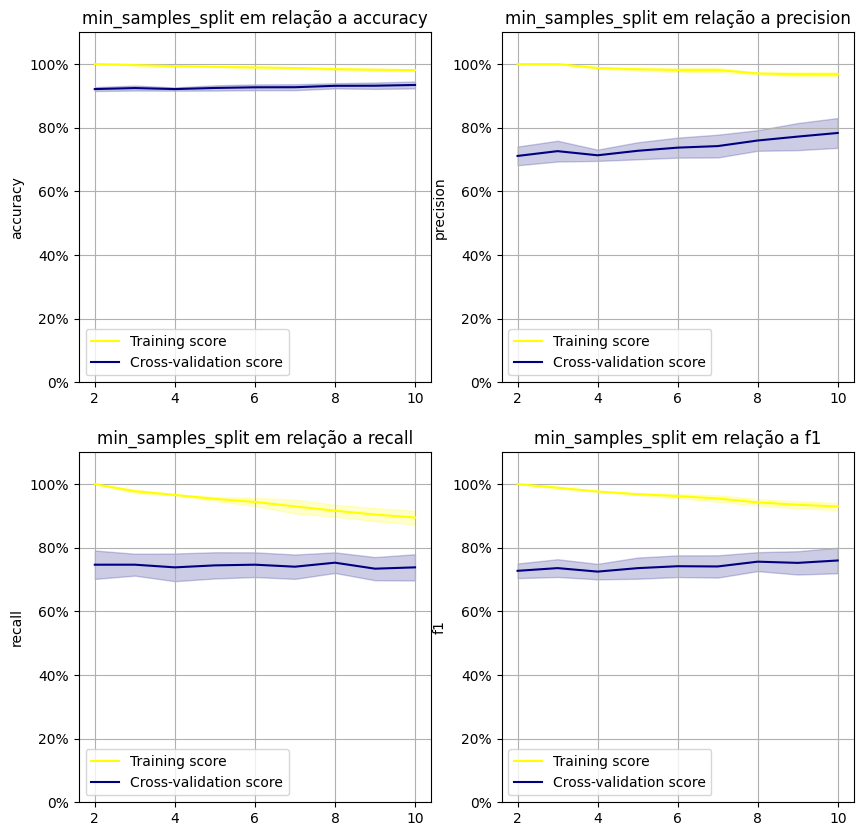

In [83]:
#@title 
param_range = np.arange(1, 11)
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Plota as curvas de validação para cada métrica
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()
for i, score in enumerate(scoring):
    train_scores, test_scores = validation_curve(pipe, X_train, y_train, param_name="classifier__min_samples_split", param_range=param_range,
                                             cv=5, scoring=score)
    train_score_mean = np.mean(train_scores, axis=1)
    train_score_std = np.std(train_scores, axis=1)
    test_score_mean = np.mean(test_scores, axis=1)
    test_score_std = np.std(test_scores, axis=1)
    
    axs[i].plot(param_range, train_score_mean, label='Training score', color='yellow')
    axs[i].fill_between(param_range, train_score_mean - train_score_std,
                         train_score_mean + train_score_std, alpha=0.2,
                         color='yellow')
    axs[i].plot(param_range, test_score_mean, label='Cross-validation score', color='navy')
    axs[i].fill_between(param_range, test_score_mean - test_score_std,
                         test_score_mean + test_score_std, alpha=0.2,
                         color='navy')
    axs[i].set(ylabel=score, ylim=(0.0, 1.1), title='min_samples_split em relação a {}'.format(score))
    axs[i].legend(loc='best')
    axs[i].grid(True)

for ax in axs.flat:
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.show()

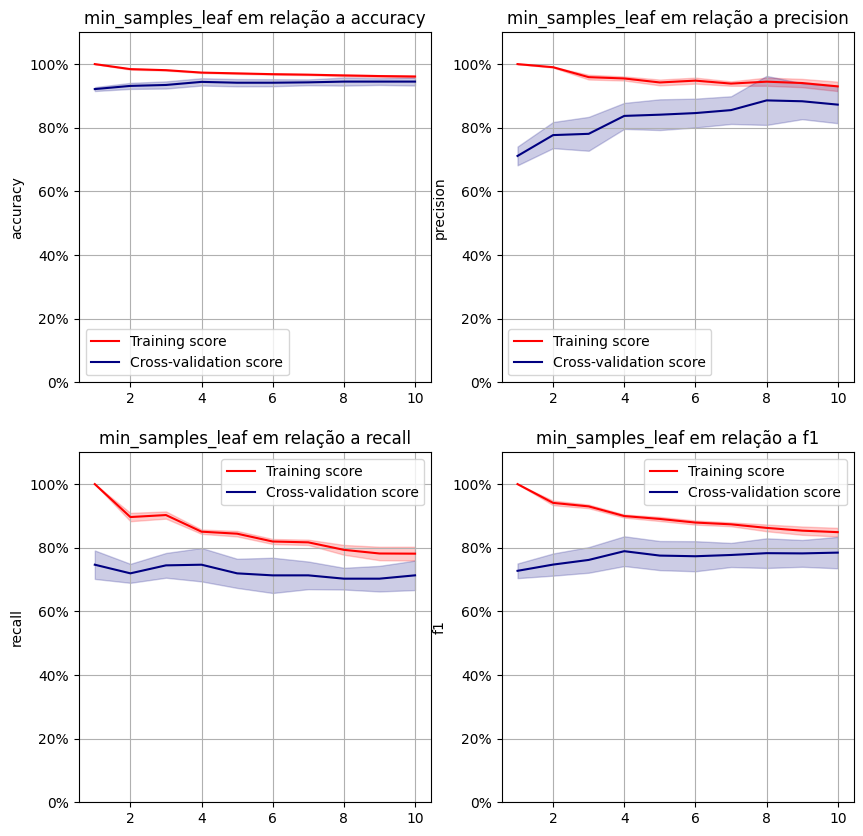

In [84]:
#@title 

param_range = np.arange(1, 11)
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Plota as curvas de validação para cada métrica
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()
for i, score in enumerate(scoring):
    train_scores, test_scores = validation_curve(pipe, X_train, y_train, param_name="classifier__min_samples_leaf", param_range=param_range,
                                                 cv=5, scoring=score)
    train_score_mean = np.mean(train_scores, axis=1)
    train_score_std = np.std(train_scores, axis=1)
    test_score_mean = np.mean(test_scores, axis=1)
    test_score_std = np.std(test_scores, axis=1)
    
    axs[i].plot(param_range, train_score_mean, label='Training score', color='red')
    axs[i].fill_between(param_range, train_score_mean - train_score_std,
                         train_score_mean + train_score_std, alpha=0.2,
                         color='red')
    axs[i].plot(param_range, test_score_mean, label='Cross-validation score', color='navy')
    axs[i].fill_between(param_range, test_score_mean - test_score_std,
                         test_score_mean + test_score_std, alpha=0.2,
                         color='navy')
    axs[i].set(ylabel=score, ylim=(0.0, 1.1), title='min_samples_leaf em relação a {}'.format(score))
    axs[i].legend(loc='best')
    axs[i].grid(True)

for ax in axs.flat:
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.show()

In [85]:
#@title 
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [5, 6, 7],
    'classifier__min_samples_split': [2, 4, 6],
    'classifier__min_samples_leaf': [1, 2, 4]
}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

grid_search = GridSearchCV(estimator=pipe,
                           param_grid=param_grid,
                           scoring=scoring,
                           cv=stratified_kfold,
                           refit='recall', # métrica utilizada para selecionar o melhor modelo
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ['classifier',
                                        DecisionTreeClassifier(random_state=42)]]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [5, 6, 7],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 4, 6]},
             refit='recall',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [86]:
#@title
results = grid_search.cv_results_
mean_accuracy = results['mean_test_accuracy']
mean_precision = results['mean_test_precision']
mean_recall = results['mean_test_recall']
mean_f1 = results['mean_test_f1']
mean_roc_auc = results['mean_test_roc_auc']

mean_accuracy = mean_accuracy[np.logical_not(np.isnan(mean_accuracy))]
mean_precision = mean_precision[np.logical_not(np.isnan(mean_precision))]
mean_recall = mean_recall[np.logical_not(np.isnan(mean_recall))]
mean_f1 = mean_f1[np.logical_not(np.isnan(mean_f1))]
mean_roc_auc = mean_roc_auc[np.logical_not(np.isnan(mean_roc_auc))]

print('Decision Tree + GridSearchCV\n')
print('Acurácia média:', mean_accuracy.mean())
print('Precisão média:', mean_precision.mean())
print('Recall médio:', mean_recall.mean())
print('F1 médio:', mean_f1.mean())
print('AUC-ROC médio:', mean_roc_auc.mean())
print("\n")

# imprime os melhores valores e melhores parâmetros para cada métrica
for metric in scoring:
    best_index = results[f"rank_test_{metric}"].argmin()
    best_params = results['params'][best_index]
    best_score = results[f"mean_test_{metric}"][best_index]
    print(f"Melhores parâmetros para {metric}: {best_params}")
    print(f"Melhor score para {metric}: {best_score}")
    print("\n")


print("Score com os dados de teste\n")
print('\nMatriz de Confusão\n\n', confusion_matrix(y_test, y_pred))
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))
print('auc-roc: ', roc_auc_score(y_test, y_pred))

Decision Tree + GridSearchCV

Acurácia média: 0.9475599128540309
Precisão média: 0.8761894636907113
Recall médio: 0.7318047433398313
F1 médio: 0.796400839530418
AUC-ROC médio: 0.8845472594616142


Melhores parâmetros para accuracy: {'classifier__criterion': 'entropy', 'classifier__max_depth': 6, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}
Melhor score para accuracy: 0.9514705882352942


Melhores parâmetros para precision: {'classifier__criterion': 'gini', 'classifier__max_depth': 7, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 4}
Melhor score para precision: 0.8989654854189737


Melhores parâmetros para recall: {'classifier__criterion': 'entropy', 'classifier__max_depth': 7, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Melhor score para recall: 0.7593859649122806


Melhores parâmetros para f1: {'classifier__criterion': 'entropy', 'classifier__max_depth': 7, 'classifier__min_samples_leaf': 4, 'classifier__min_sa

##**2.3 Random Forest**

In [87]:
#@title 
df = pd.read_csv('drive/MyDrive/Colab Datasets/train.csv')
df['churn'] = df['churn'].replace({'yes': 1, 'no': 0})

lb = LabelBinarizer()
df['international_plan'] = lb.fit_transform(df['international_plan'])
df['voice_mail_plan'] = lb.fit_transform(df['voice_mail_plan'])

dummy_area_codes = pd.get_dummies(df['area_code'], prefix='area_code')
df = pd.concat([df, dummy_area_codes], axis=1)
df.drop(['state', 'area_code'], axis=1, inplace=True)

# divisão em treino e teste
X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [88]:
pipe = Pipeline(steps = [['standardscaler', StandardScaler()],
                         ['classifier', RandomForestClassifier(random_state=42)]])

pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ['classifier', RandomForestClassifier(random_state=42)]])

In [89]:
#@title 
scores = cross_validate(pipe, X_train, y_train, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=5)

print('Random Forest\n')
print('Acurácia média:', scores['test_accuracy'].mean())
print('Precisão média:', scores['test_precision'].mean())
print('Recall médio:', scores['test_recall'].mean())
print('f1 médio:', scores['test_f1'].mean())
print('AUC-ROC médio:', scores['test_roc_auc'].mean())

y_pred = pipe.predict(X_test)

print('\n')
print("Score com os dados de teste\n")
print('\nMatriz de Confusão\n\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('auc-roc: ', roc_auc_score(y_test, y_pred))

Random Forest

Acurácia média: 0.9523529411764706
Precisão média: 0.9197026433155913
Recall médio: 0.7235964912280701
f1 médio: 0.8091591406490034
AUC-ROC médio: 0.9224168335282137


Score com os dados de teste


Matriz de Confusão

 [[729   1]
 [ 38  82]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       730
           1       0.99      0.68      0.81       120

    accuracy                           0.95       850
   macro avg       0.97      0.84      0.89       850
weighted avg       0.96      0.95      0.95       850

auc-roc:  0.8409817351598173


In [94]:
pipe = imbpipeline(steps=[('standardscaler', StandardScaler()), 
                          ('smt', SMOTETomek(random_state=42)),
                          ('classifier', RandomForestClassifier(random_state=42))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('smt', SMOTETomek(random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [95]:
#@title 
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

scores = cross_validate(pipe, X_train, y_train, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=cv, n_jobs=-1)

print('Random Forest + SMOTETomek\n')
print('Acurácia média:', scores['test_accuracy'].mean())
print('Precisão média:', scores['test_precision'].mean())
print('Recall médio:', scores['test_recall'].mean())
print('f1 médio:', scores['test_f1'].mean())
print('AUC-ROC médio:', scores['test_roc_auc'].mean())

y_pred = pipe.predict(X_test)
print("\nScore com os dados de teste\n")
print('\nMatriz de Confusão\n\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('auc-roc: ', roc_auc_score(y_test, y_pred))

Random Forest + SMOTETomek

Acurácia média: 0.949313725490196
Precisão média: 0.8310257105230661
Recall médio: 0.8046929824561404
f1 médio: 0.8170386846453539
AUC-ROC médio: 0.9241800399183917

Score com os dados de teste


Matriz de Confusão

 [[717  13]
 [ 25  95]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       730
           1       0.88      0.79      0.83       120

    accuracy                           0.96       850
   macro avg       0.92      0.89      0.90       850
weighted avg       0.95      0.96      0.95       850

auc-roc:  0.8869292237442922


In [96]:
pipe = imbpipeline(steps=[('standardscaler', StandardScaler()), 
                          ('smt', SMOTETomek(random_state=42)),
                          ('classifier', RandomForestClassifier(random_state=42, max_depth=30, n_estimators=200,
                                                                criterion='entropy', class_weight='balanced'))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('smt', SMOTETomek(random_state=42)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=30,
                                        n_estimators=200, random_state=42))])

In [97]:
#@title 
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

scores = cross_validate(pipe, X_train, y_train, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=cv, n_jobs=-1)

print('Random Forest + SMOTETomek + fine-tunning\n')
print('Acurácia média:', scores['test_accuracy'].mean())
print('Precisão média:', scores['test_precision'].mean())
print('Recall médio:', scores['test_recall'].mean())
print('f1 médio:', scores['test_f1'].mean())
print('AUC-ROC médio:', scores['test_roc_auc'].mean())

y_pred = pipe.predict(X_test)
print("\nScore com os dados de teste\n")
print('\nMatriz de Confusão\n\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('auc-roc: ', roc_auc_score(y_test, y_pred))

Random Forest + SMOTETomek + fine-tunning

Acurácia média: 0.9500000000000001
Precisão média: 0.8321250483268672
Recall médio: 0.808187134502924
f1 médio: 0.8195786725023244
AUC-ROC médio: 0.92212293469118

Score com os dados de teste


Matriz de Confusão

 [[721   9]
 [ 24  96]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       730
           1       0.91      0.80      0.85       120

    accuracy                           0.96       850
   macro avg       0.94      0.89      0.92       850
weighted avg       0.96      0.96      0.96       850

auc-roc:  0.8938356164383562
